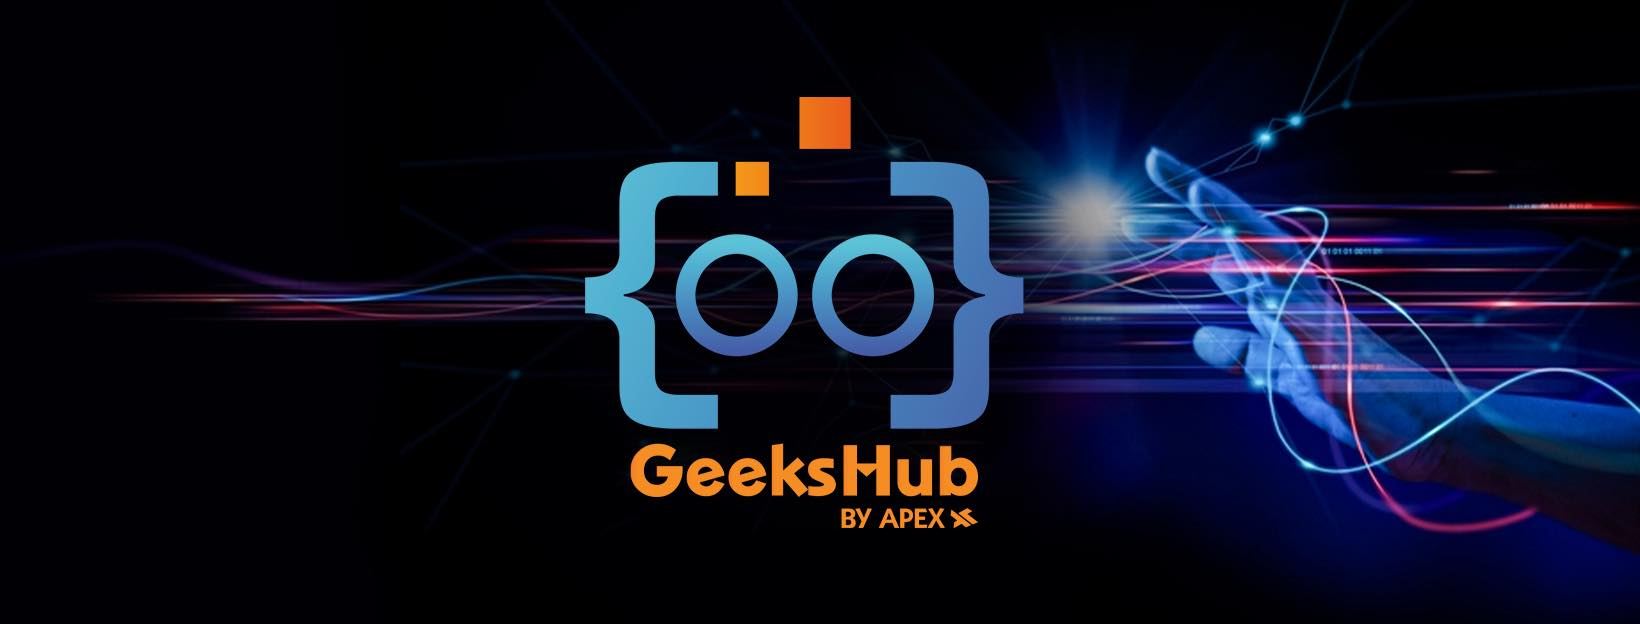

# Feature Selection

Sometimes building strong models is not enough, we would need to choose the best features that would lead to the best model. 


This is crucial as some feature may not be of added value to the model performance and could possibly lead to underfitting. Presence of unncessary features can also sometimes lead to overfitting when features can be a cause of an ungeneralisable model.

Feature selection can also provide insight on dataset that would rather be unclear at first.

One last thing, remmber , the less features you have the more meaningful model you build, the less compuational resources you need

In this notebook we will try to go over some of the most common feature selection methods, namingly: 
  
      * Filter method 
      * Model-based/Ensemble methods 
      * Wrapper Methods 
      * Unsupervised Methods 
      
highly recommend to read sklearn.feature_selection documentation: https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold

dataset source :https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html


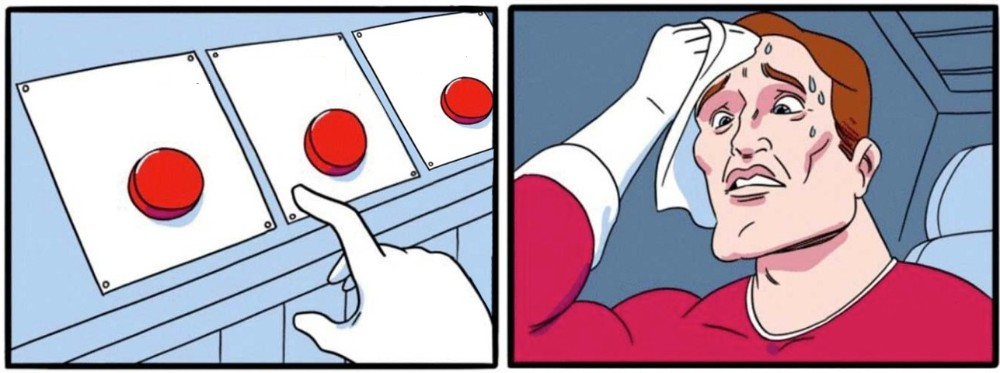

In [35]:
# basic imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_breast_cancer
x,y=load_breast_cancer(return_X_y=True,as_frame=True)



from sklearn.feature_selection import chi2,SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector


In [2]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [4]:
#data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15)




In [5]:
def test(model,cols):
    preds=model.predict(xtest[cols])
    print(f"accuracy on test set: {accuracy_score(preds,ytest):.2f} and f1 score is {f1_score(preds,ytest):.2f}")
    preds=model.predict(xtrain[cols])
    print(f"accuracy on train set: {accuracy_score(preds,ytrain):.2f} and f1 score is {f1_score(preds,ytrain):.2f}")


def forest_quick(cols):
    print(f"Number of features:{len(cols)}")
    x=xtrain[cols]
    clf=RandomForestClassifier()
    clf.fit(x,ytrain)
    test(clf,cols)

## 1. Filter Method 
 These techniques select features purely based on metrics like correlation, variance, statistcial tests and other metrics. These methods do not depend on results obtained from any model and usually check the relationship of each feature with the response variable to be predicted. 
 
The main advantage of filter method is that its is computationally cheap as you do not need to build mutiple models. Other advantages include the fact that they rely completely on features of dataset rather than models as well as being based on statistical methods.

The main disadvantage of filter method is that it underestimates the possibility that a feature on it's own is not useful but combined with other features can be of added value. Some of these features can be falsely removed. 

Examples of filter method:
    
    * variance threshold method 
    * chi-squared method 
    * correlation method 



 

In [6]:
xtrain.shape

(483, 30)

### (1) Chi squared test for feature selection 
 we choose the feature that score the highest on chi squared test and hence are the most dependent on target and vice-versa 

In [7]:



selectfeatures=SelectKBest(score_func=chi2,k=5)
best=selectfeatures.fit(xtrain,ytrain)

In [8]:
best.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [9]:
xtrain[xtrain.columns[best.get_support()]]

,mean perimeter,mean area,area error,worst perimeter,worst area
364,85.48,552.4,13.22,93.76,663.5
392,102.40,744.7,66.91,142.10,1359.0
45,123.70,1076.0,71.56,150.60,1567.0
175,54.42,227.2,11.36,58.36,259.2
257,103.20,713.3,59.46,119.80,928.8
...,...,...,...,...,...
229,85.26,503.2,25.13,105.30,706.0
466,85.98,536.9,27.40,100.90,689.1
500,98.73,689.4,34.84,109.70,856.9
172,102.50,736.9,44.64,125.00,1102.0


In [10]:
bestcols=xtrain.columns[best.get_support()]

In [11]:
forest_quick(xtrain.columns)

Number of features:30
accuracy on test set: 0.92 and f1 score is 0.93
accuracy on train set: 1.00 and f1 score is 1.00


In [12]:
forest_quick(bestcols)

Number of features:5
accuracy on test set: 0.93 and f1 score is 0.94
accuracy on train set: 1.00 and f1 score is 1.00


### (2) Correlation for feature selection
we remove the columns that have least correlation with target variable 

<AxesSubplot: >

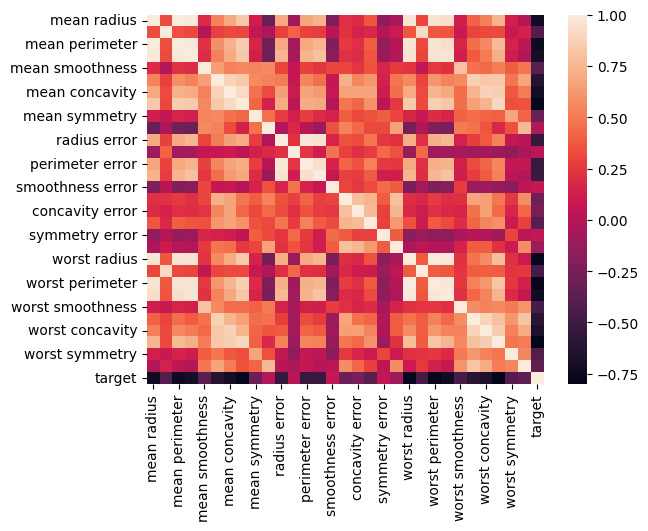

In [13]:

data=pd.concat([xtrain,ytrain],axis=1)
sns.heatmap(data.corr())

In [14]:
corrs=np.abs(data.corr()["target"]).sort_values(ascending=False)
corrs

target                     1.000000
worst concave points       0.800410
mean concave points        0.783263
worst perimeter            0.782666
worst radius               0.776231
mean perimeter             0.739061
worst area                 0.732730
mean radius                0.726035
mean concavity             0.712283
mean area                  0.705587
worst concavity            0.670477
mean compactness           0.628106
worst compactness          0.604628
radius error               0.551048
perimeter error            0.537838
area error                 0.529728
worst texture              0.471268
worst smoothness           0.457379
mean texture               0.412803
worst symmetry             0.411481
concave points error       0.383505
mean smoothness            0.382117
worst fractal dimension    0.351223
mean symmetry              0.306803
compactness error          0.300671
concavity error            0.247863
fractal dimension error    0.093587
smoothness error           0

In [15]:
corrs.keys()[1:6]

Index(['worst concave points', 'mean concave points', 'worst perimeter',
       'worst radius', 'mean perimeter'],
      dtype='object')

In [16]:
best_corss=corrs.keys()[1:6]
forest_quick(best_corss)

Number of features:5
accuracy on test set: 0.91 and f1 score is 0.92
accuracy on train set: 1.00 and f1 score is 1.00


## 2.Wrapper  and Model-Based Methods 

These techniques try to capture interaction between multiple features by using a recursive approach to build multiple models using feature subsets and select the best subset of features giving us the best performing model. Methods like backward selecting and forward elimination are popular wrapper based methods. Wrapper methods are also called greedy methods since they try alot of different models to achieve optimal feature selection

Advantages of these methods are mainly that they are better at finding features that lead to better models as they investigate usefulness.

Disadvantages of these methods are that they can be computaionally expensive plus they might lead to overfitting. 


Model-based methods are simpler and less compuational than wrapper method since they depend on fitting one model instead of recursively trying out different ones 



### (1) Simplest way is Feature Importances (Model-Based Methods)



In [20]:
clf=RandomForestClassifier()
clf.fit(xtrain,ytrain)

RandomForestClassifier()

In [21]:
clf.feature_importances_

array([0.0421165 , 0.01178348, 0.04864312, 0.04544388, 0.00703135,
       0.010921  , 0.08264206, 0.13739858, 0.00211082, 0.00339797,
       0.00764713, 0.00310177, 0.01277732, 0.02196653, 0.00447191,
       0.00350152, 0.00440541, 0.00594344, 0.00235664, 0.00364349,
       0.07067209, 0.01911311, 0.11397068, 0.13614352, 0.01869744,
       0.01964404, 0.0310236 , 0.11045882, 0.01072563, 0.00824715])

<BarContainer object of 30 artists>

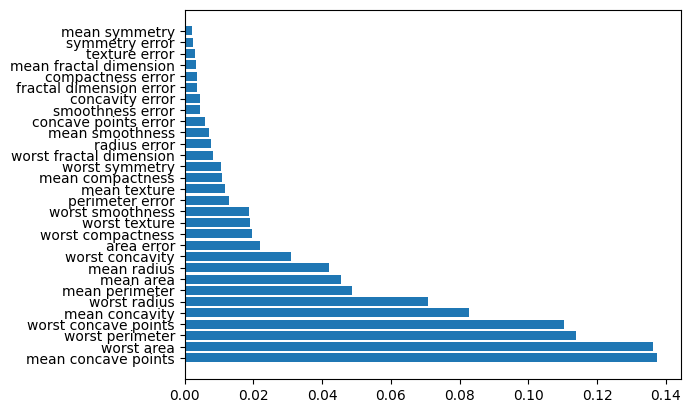

In [22]:
imps=pd.Series(clf.feature_importances_)
imps.index=xtrain.columns
imps=imps.sort_values(ascending=False)
plt.barh(imps.keys(),imps.values)

In [23]:
imps

mean concave points        0.137399
worst area                 0.136144
worst perimeter            0.113971
worst concave points       0.110459
mean concavity             0.082642
worst radius               0.070672
mean perimeter             0.048643
mean area                  0.045444
mean radius                0.042116
worst concavity            0.031024
area error                 0.021967
worst compactness          0.019644
worst texture              0.019113
worst smoothness           0.018697
perimeter error            0.012777
mean texture               0.011783
mean compactness           0.010921
worst symmetry             0.010726
worst fractal dimension    0.008247
radius error               0.007647
mean smoothness            0.007031
concave points error       0.005943
smoothness error           0.004472
concavity error            0.004405
fractal dimension error    0.003643
compactness error          0.003502
mean fractal dimension     0.003398
texture error              0

In [24]:
best_imps=imps.keys()[:4]

In [25]:
forest_quick(best_imps)

Number of features:4
accuracy on test set: 0.91 and f1 score is 0.92
accuracy on train set: 1.00 and f1 score is 1.00


In [26]:
## another way is using sklearn SelectfromModel 
## documentation also suggests using L1 SVC 
from sklearn.feature_selection import SelectFromModel
select=SelectFromModel(clf,prefit=True)

In [27]:
select.fit(xtrain,ytrain)
x_new=select.transform(xtrain)
x_new

array([[1.340e+01, 8.548e+01, 5.524e+02, ..., 9.376e+01, 6.635e+02,
        6.987e-02],
       [1.549e+01, 1.024e+02, 7.447e+02, ..., 1.421e+02, 1.359e+03,
        2.121e-01],
       [1.865e+01, 1.237e+02, 1.076e+03, ..., 1.506e+02, 1.567e+03,
        2.378e-01],
       ...,
       [1.504e+01, 9.873e+01, 6.894e+02, ..., 1.097e+02, 8.569e+02,
        1.018e-01],
       [1.546e+01, 1.025e+02, 7.369e+02, ..., 1.250e+02, 1.102e+03,
        1.827e-01],
       [1.453e+01, 9.425e+01, 6.597e+02, ..., 1.081e+02, 8.305e+02,
        9.594e-02]])

In [28]:
select.feature_names_in_

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype=object)

In [29]:
select.get_feature_names_out()

array(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'], dtype=object)

In [30]:
forest_quick(select.get_feature_names_out())

Number of features:9
accuracy on test set: 0.93 and f1 score is 0.94
accuracy on train set: 1.00 and f1 score is 1.00


### (2) Backward Elimination (Wrapper Methods)

In sklearn there is a class called Recursive Feature elimination , this is a more exhuastive way of using feature importances for feature selection

Feature elimination works as follows :
        
        1.A model is built with a given set of features 
        2. Feature importances are computed 
        3. the features with least importance are removed 
        4. Another model is build and so on 
        5. the process stops until the desired number of features are reached 

In [31]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
rfe = RFE(model, n_features_to_select=5, step=1)
rfe.fit(xtrain, ytrain)


RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [32]:
rfe.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [33]:
xtrain.columns[rfe.get_support()]

Index(['mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

In [34]:
forest_quick(xtrain.columns[rfe.get_support()])

Number of features:5
accuracy on test set: 0.91 and f1 score is 0.92
accuracy on train set: 1.00 and f1 score is 1.00


### (3) Sequential Selection (Wrapper Method)

There is a class in sklearn called SequentialFeatureSelector. This class allows for both forward and backward selection. This method is the most compuationally expensive out of all methods. Remember it does not depend on feature selection. This is how forward sequential selection works :
    
        1. model is built on a set of features 
        2. cross-validation accuracy is calculated 
        3. model adds a new feature 
        4. if accuracy improves, feature is kept, otherwise it is not and so on 
        5. process stops when desired number features are found

In [36]:
model=SVC()
sequence=SequentialFeatureSelector(model,n_features_to_select=5,direction="forward")
sequence.fit(xtrain,ytrain)

SequentialFeatureSelector(estimator=SVC(), n_features_to_select=5)

In [39]:
sequence.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False])

In [40]:
forest_quick(xtrain.columns[sequence.get_support()])

Number of features:5
accuracy on test set: 0.95 and f1 score is 0.96
accuracy on train set: 1.00 and f1 score is 1.00


In [41]:
model=SVC()
sequence=SequentialFeatureSelector(model,n_features_to_select=5,direction="backward")
sequence.fit(xtrain,ytrain)
forest_quick(xtrain.columns[sequence.get_support()])

Number of features:5
accuracy on test set: 0.94 and f1 score is 0.95
accuracy on train set: 1.00 and f1 score is 1.00


##  3. Unsupervised Learning 

Just a glimpse for now

Dimensionality Reduction :)

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(xtrain)

xcompressed=pca.transform(xtrain)
testcompressed=pca.transform(xtest)
xcompressed.shape,testcompressed.shape

((483, 2), (86, 2))

In [47]:
clf=RandomForestClassifier()
clf.fit(xcompressed,ytrain)

RandomForestClassifier()

In [48]:
predstrain=clf.predict(xcompressed)
predstest=clf.predict(testcompressed)

In [51]:
print(f"accuracy on test set: {accuracy_score(predstest,ytest):.2f} and f1 score is {f1_score(predstest,ytest):.2f}")
print(f"accuracy on train set: {accuracy_score(predstrain,ytrain):.2f} and f1 score is {f1_score(predstrain,ytrain):.2f}")

accuracy on test set: 0.91 and f1 score is 0.92
accuracy on train set: 1.00 and f1 score is 1.00
